<a href="https://colab.research.google.com/github/marcyomacedo/MK/blob/master/Marcio_Macedo_da_Silva_Filho_6_Atividade_Pr%C3%A1tica_Redes_Neurais_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Prática Redes Neurais Fashion

O objetivo desta prática é fazer com que vocês tenham um contato mínimo com Redes Neurais (numa perspectiva prática) e com um problema de classificação que exige um pouco mais de processamento. Além disso, desejo que vocês possam se atentar à formas de realizar plots (gráficos) mais interessantes para comprar resultados em projetos de classificação.

O Projeto está utilizando o conjunto de dados (dataset) chamado **MNIST**, que classifica dígitos manuscritos já digitalizados. O objetivo é acompanhar cada trecho do código. Vocês deverão:

1. Executar cada célula,
2. Ver os resultados, e então
3. Fazer a alteração do conjunto de dados para o **FASHION MINST** 

Este dataset FASHION MINST, é um dataset de imagens de roupas e artigos de uso pessoal.

A prática se divide em seis (6) etapas: Exploração dos Dados, Aplicação de pré-processamento simples, Contrução do modelo, Trainamento, Avaliação do desempenho e, por fim, a realização de predições, ou seja seu uso.

## Etapa 1 - Obtenção e Exploração dos Dados

In [ ]:
# carregando as bibliotecas essenciais

# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Outras bibliotecas auxiliares
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# carregando o data set MNIST
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


O comando anterior faz o download e carrega um conjunto de imagens que representam dígitos manuscritos. Uma descrição maior sobre o dataset pode ser obtida no seguinte endereço: 

*   https://keras.io/api/datasets/mnist/
*   http://yann.lecun.com/exdb/mnist/

De forma resumida o dataset é composto de 60 mil imagens de treinamento e de 10 mil imagens de teste. Cada imagem possuí 28x28 pixels e são armazenadas em formato de matrizes de 28x28 linhas e colunas em escala de cinza.

Enquanto as variáveis (train, test)_images armazenam as os valores dos pixels, as variáveis (train, test)_labels armazenam as classes a que pertecem. Neste caso o número associado ao dígito.

In [ ]:
# criando uma variável auxiliar para os gráficos com os nomes das classes
class_names = ['zero', 'um', 'dois', 'três', 'quatro',
               'cinco', 'seis', 'sete', 'oito', 'nove']

In [ ]:
# explorando informações sobre os dados
# formato dos dados de entrada para treinamento
print(f"formato dos dados: {train_images.shape}")

# tamanho da quantidade de dados
print(f"tamanho do dataset, treino: {len(train_labels)} e teste: {len(test_labels)}")

# mostrando os valores únicos presente no vetor de classificação
print(f"valores únicos de y do dataset: {np.unique(train_labels)}")

formato dos dados: (60000, 28, 28)
tamanho do dataset, treino: 60000 e teste: 10000
valores únicos de y do dataset: [0 1 2 3 4 5 6 7 8 9]


## Etapa 2 - Processamento inicial dos dados

Nessa etapa, vamos vizualizar um exemplo de imagem, transformá-la em um tipo numérico normalizando os dados entre valores [0,1] e exibir um cojunto de exemplos como um grid de imagens.

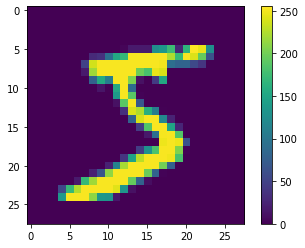

In [ ]:
# criando uma vizualização com os dados antes da normalização
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Para que a rede neural aprenda mais rápido, assim como fizemos em alguns 
# exemplos do scikit-learn, é necessário normalizar a imagem entre valores de [0, 1]

print(f"exemplo de dado antes do procesamento: {train_images[0, 5, :]}")

train_images = train_images / 255.0

test_images = test_images / 255.0

print(f"exemplo de dado após o procesamento: {train_images[0, 5, :]}")

exemplo de dado antes do procesamento: [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
 175  26 166 255 247 127   0   0   0   0]
exemplo de dado após o procesamento: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.01176471 0.07058824 0.07058824 0.07058824 0.49411765 0.53333333
 0.68627451 0.10196078 0.65098039 1.         0.96862745 0.49803922
 0.         0.         0.         0.        ]


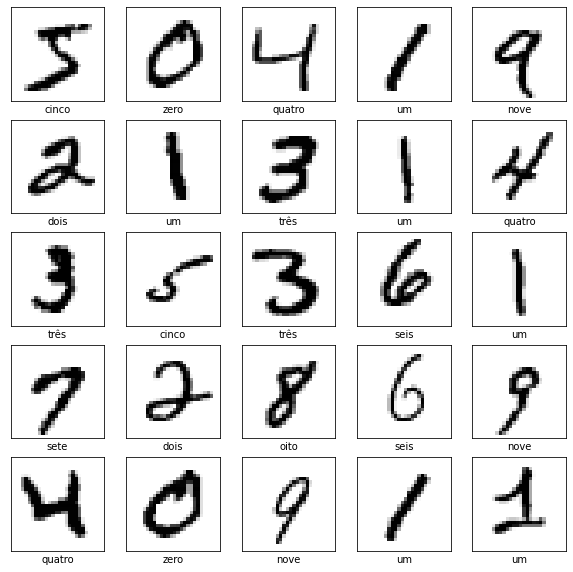

In [ ]:
# criando uma vizualização dos 25 primeiros exemplos contidos no dataset
# porém agora na escala de cinza, com cores de 0 a 1

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])   # retira as marcações de x e y 
    plt.yticks([])
    plt.grid(False)  # retira as linhas do grid
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])   # adiciona os nomes das classes (nomes dos digitos)
plt.show()

## 3 - Construindo o Modelo Neural

Diferente dos modelos do scikit-learn, no keras é necessário definir um modelo a partir de componentes. Cada rede neural pode ter diferentes tipos de camadas de neurônios e difentes quantidades de neurônios por camada.




In [ ]:
# cria a variável modelo e atribui a ela uma rede neural

model = keras.Sequential([
    # essa camada transforma os dados do formato 28x28 para 784,1
    keras.layers.Flatten(input_shape=(28, 28)),   
    
    # essa camada tem 128 neurônios 
    keras.layers.Dense(128, activation='relu'), 

    # essa tem 10 neurônios, é obrigatório manter 10 porque é exatamente o mesmo número de classes que existe
    keras.layers.Dense(10, activation='softmax')  
])

In [ ]:
# agora é necessário 'compilar' (fazer a rede se montar) o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 4 - Treinamento do modelo

Até então os modelos e problemas que fizemos anteriormente no scikit-learn não demandaram excessivo processamento. Com redes neurais pode ser um pouco diferente, dependendo sobretudo da quantidade de dados e na quantidade de neurônios na arquitetura (quanto mais neurônios maior o tempo necessário).

In [ ]:
# treinamento o modelo (é o mesmo método utilizado no scikit-learn)
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4312 - accuracy: 0.8778
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1210 - accuracy: 0.9647
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0763 - accuracy: 0.9757
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0516 - accuracy: 0.9842
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0416 - accuracy: 0.9877
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0308 - accuracy: 0.9910
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0239 - accuracy: 0.9931
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0175 - accuracy: 0.9954
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0167 - accuracy: 0.9949
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.012

## 5 - Avaliação a partir da acurácia

O método utilizado para avaliar aqui será a acurácia

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(f"Acurácia do conjunto de teste: {test_acc}")

313/313 - 0s - loss: 0.0859 - accuracy: 0.9772
Acurácia do conjunto de teste: 0.9771999716758728


Para essa estrutura de rede o treinamento gera um bom nível de aprendizagem para esse dataset

## 6 - Fazendo predições, a melhor parte!

Nesta sequência de códigos o objetivo é criar duas funções:
1. plotar e comparar uma imagem (X) e sua classe (y) dados pelo modelo já previamente treinados
2. plotar uma sequência de imagens mostram o valor predito e a imagem do valor real (X)

Observem que as barras em azul são valores corretos e em vermelho valores incorretos. Tente ler e entender o que ocorre em cada conjunto de códigos a seguir

In [ ]:
# comando para predizer
predictions = model.predict(test_images)

print(f"predições de exemplo: {predictions[0]}")

predições de exemplo: [1.31749922e-09 9.09029310e-11 5.03063745e-07 7.07168681e-07
 1.53044041e-13 1.01787426e-10 8.37647063e-13 9.99998331e-01
 1.12731291e-08 4.88951457e-07]


O código anterior mostra que a saída predita tem 10 valores, a posição com o maior valor indica o que o modelo acredita ser o valor de entrada de (X). Neste caso, para o valor de teste, ele acredita que seja o índice 7 (corresponde ao dígito 8), pois é índice com maior saída.

In [ ]:
# checando o índice de maior valor
np.argmax(predictions[0])

7

In [ ]:
# resultado real diz que ele acertou
test_labels[0]

7

Agora são definidas duas funções para melhor enxergar o resultado.

In [ ]:
# função para plotar a imagem
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# função para plotar um gráfico em barras com os valores preditos (saída y do modelo)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


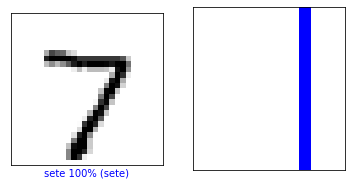

In [ ]:
# usando o código anterior para um exemplo
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

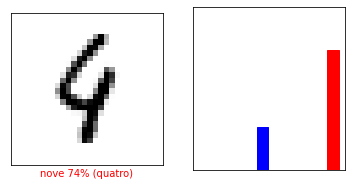

In [ ]:
# um segundo exemplo impreciso
i = 115
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

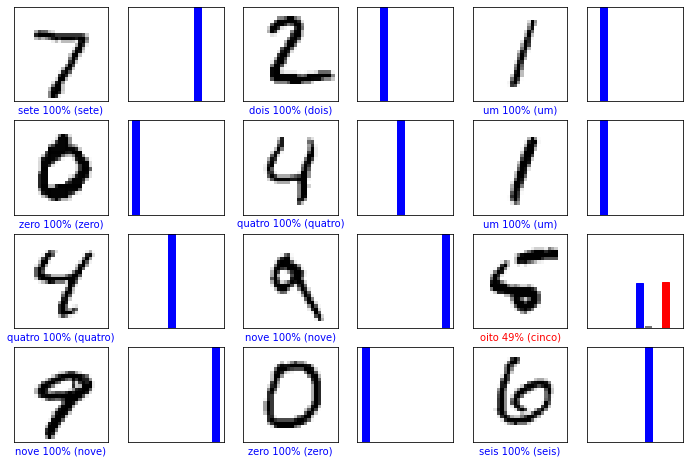

In [ ]:
# um exemplo com mais plots de uma só vez
# predições corretas em azul e as incorretas de vermelho

num_rows = 4
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

## Útima etapa: Alterar o código para funcionar com o dataset Fashion MINST

Como etapa de trabalho, vocês precisarão alterar o código para funcionar com o Fashion MINST. O código a seguir pode auxiliar para baixar o dataset.

```
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
```

lembrem-se de criar a variável auxiliar para nomear as classes:

```
class_names = ['camiseta/top', 'calça', 'suéter', 'vestido', 'casaco', sandália', 'camisa', 'tênis', 'bola', 'bota']
```

Experimentem mudar os valores de neurônios na primeira camada Densa, mudando o valor de 128 para 10, 20, 60 e 300 e veja o que acontece ao resultado do modelo.



```
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),  <== NESSA LINHA  [altere o 128 para valores como: 10 ou 20 ou 60 ou 300
    keras.layers.Dense(10, activation='softmax')
])

```

**Carregamento do Datashet Fashion MNIST**

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

**Visualização dos dados**

In [ ]:
train_images[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [ ]:
# variavel auxiliar
class_names = ['camiseta/top', 'calça', 'suéter', 'vestido', 'casaco', 'sandália', 'camisa', 'tênis', 'bolsa', 'bota']

In [ ]:
# criando uma vizualização com os dados antes da normalização
print(f"formato dos dados: {train_images.shape}")

print(f"tamanho do dataset, treino: {len(train_labels)} e teste: {len(test_labels)}")

print(f"valores únicos de y do dataset: {np.unique(train_labels)}")

formato dos dados: (60000, 28, 28)
tamanho do dataset, treino: 60000 e teste: 10000
valores únicos de y do dataset: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
train_images[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
# criando uma vizualização dos 25 primeiros exemplos contidos no dataset
# porém agora na escala de cinza, com cores de 0 a 1

print(f"exemplo de dado antes do procesamento: {train_images[0, 5, :]}")

train_images = train_images / 255.0

test_images = test_images / 255.0

print(f"exemplo de dado após o procesamento: {train_images[0, 5, :]}")

exemplo de dado antes do procesamento: [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
 144 123  23   0   0   0   0  12  10   0]
exemplo de dado após o procesamento: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.02352941 0.         0.4        0.8        0.69019608 0.5254902
 0.56470588 0.48235294 0.09019608 0.         0.         0.
 0.         0.04705882 0.03921569 0.        ]


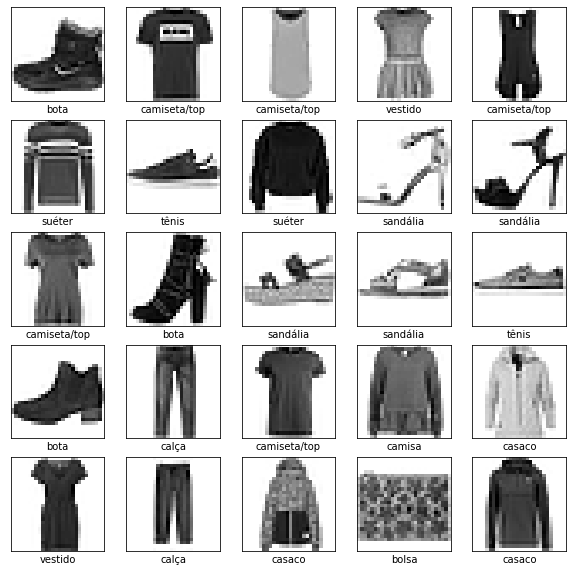

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])   # retira as marcações de x e y 
    plt.yticks([])
    plt.grid(False)  # retira as linhas do grid
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])   # adiciona os nomes das classes (nomes dos digitos)
plt.show()

**Camada da Rede Neural**

In [ ]:
# cria a variável modelo e atribui a ela uma rede neural
model = keras.Sequential([
    # essa camada transforma os dados do formato 28x28 para 784,1
    keras.layers.Flatten(input_shape=(28, 28)),
    # essa camada tem 128 neurônios 
    keras.layers.Dense(200, activation='relu'),  # NESSA LINHA  [altere o 128 para valores como: 10 ou 20 ou 60 ou 300
    keras.layers.Dense(200, activation='relu'),
    # essa tem 10 neurônios, é obrigatório manter 10 porque é exatamente o mesmo número de classes que existe
    keras.layers.Dense(10, activation='softmax')
])

**Gerar Modelo**

In [ ]:
# agora é necessário 'compilar' (fazer a rede se montar) o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Treinar o modelo**

In [ ]:
# treinamento o modelo (é o mesmo método utilizado no scikit-learn)
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5956 - accuracy: 0.7863
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3675 - accuracy: 0.8646
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3302 - accuracy: 0.8784
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3003 - accuracy: 0.8875
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2796 - accuracy: 0.8951
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2673 - accuracy: 0.9000
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2563 - accuracy: 0.9037
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2438 - accuracy: 0.9085
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2350 - accuracy: 0.9109
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.223



**Resultado de acurácia**

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(f"Acurácia do conjunto de teste: {test_acc}")

313/313 - 0s - loss: 0.4291 - accuracy: 0.8866
Acurácia do conjunto de teste: 0.8866000175476074


**Fazendo a Predição**

In [ ]:
# comando para predizer
predictions = model.predict(test_images)

In [ ]:
print(f"predições de exemplo: {predictions[0]}")

predições de exemplo: [7.0216994e-15 1.0595630e-17 2.6063273e-17 2.9262071e-16 1.1380746e-14
 8.0804330e-07 2.3922686e-15 3.7306167e-05 3.9572354e-15 9.9996185e-01]


In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
# um exemplo com mais plots de uma só vez
# predições corretas em azul e as incorretas de vermelho

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# função para plotar um gráfico em barras com os valores preditos (saída y do modelo)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

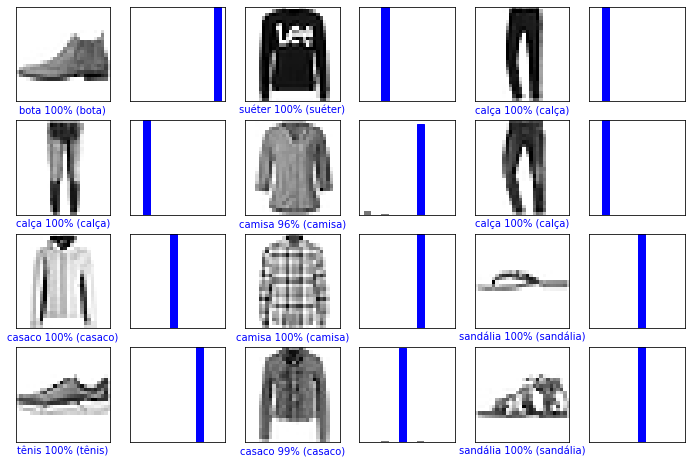

In [ ]:
num_rows = 4
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

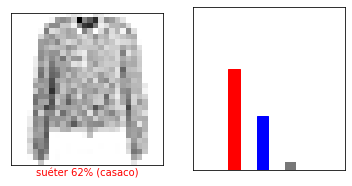

In [ ]:
i = 51
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

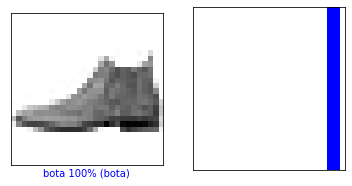

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()